In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset.dataset import get_test_datasets, get_validation_datasets, get_dataset_shapes
from experiment.model import get_scalar_model, get_vector_model
from experiment.learning import validate_model, validate_model_multiple, test_model, test_model_multiple

In [2]:
train_dataset, test_dataset = get_test_datasets('cardiotocography1', random_seed=200, feature_range=(0,1))
datasets_generator_fun = lambda: get_validation_datasets('cardiotocography1', random_seed=200, feature_range=(0,1))
dataset_shapes = get_dataset_shapes('cardiotocography1')
num_tries = 15

dataset_shapes

([21], [10])

In [4]:
# Shape
def get_dims(x, i, o):
    return i - x * (i - o) / 4

for x in range(1,4):
    print(f'{get_dims(x, dataset_shapes[0][0], dataset_shapes[1][0]):.2f}')

18.25
15.50
12.75


### S(X,X,X)

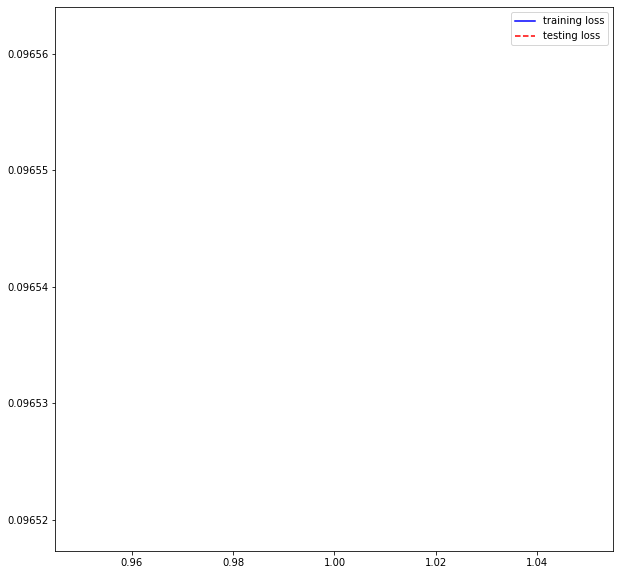

Elapsed training time: 0.55915 sec
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 18)                396       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                304       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                221       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                140       
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_fun = lambda: get_scalar_model(dataset_shapes, hidden_layer_units=[18, 16, 13], activation='relu', output_activation=None, \
    kernel_initializer='random_normal', bias_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(2)

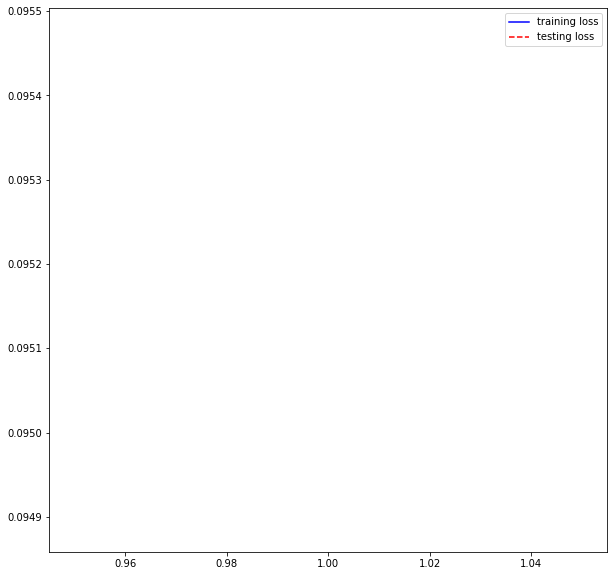

Elapsed training time: 0.80139 sec
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input (VInput)             (None, 22, 5)             110       
_________________________________________________________________
v_fractal (VFractal)         (None, 6, 10)             430       
_________________________________________________________________
v_output_1 (VOutput)         (None, 10)                0         
Total params: 540
Trainable params: 540
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

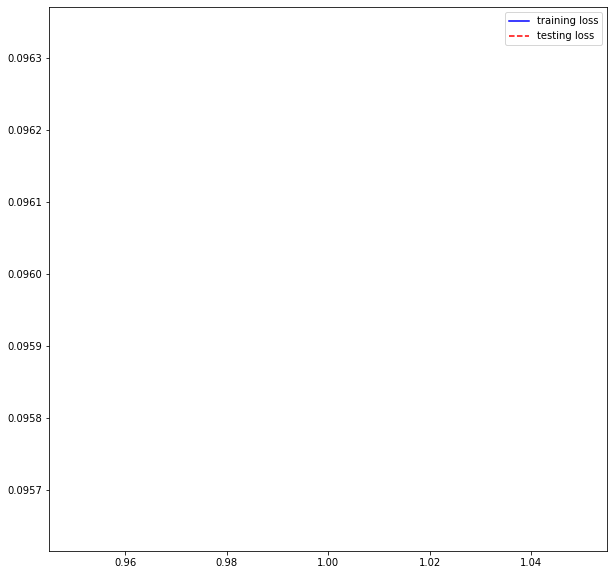

Elapsed training time: 0.91729 sec
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input_2 (VInput)           (None, 22, 10)            220       
_________________________________________________________________
v_fractal_2 (VFractal)       (None, 11, 10)            850       
_________________________________________________________________
v_output_3 (VOutput)         (None, 10)                0         
Total params: 1,070
Trainable params: 1,070
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(10,), inner_hidden_layer_units=(2,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(3)

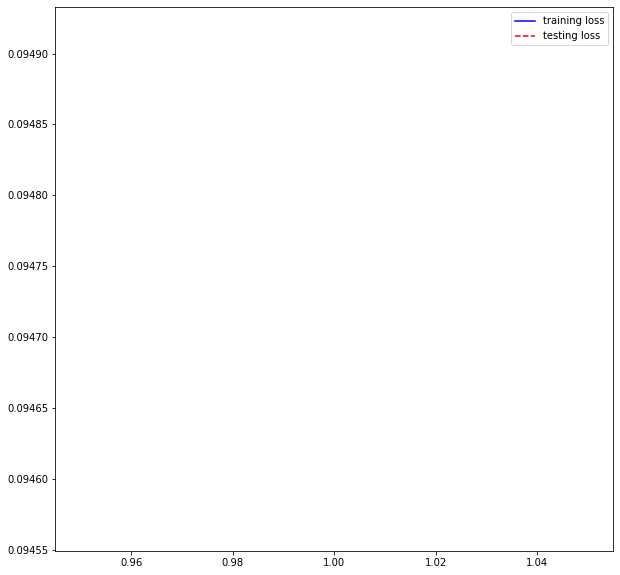

Elapsed training time: 1.19928 sec
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
v_input_10 (VInput)          (None, 22, 8)             176       
_________________________________________________________________
v_fractal_10 (VFractal)      (None, 9, 10)             938       
_________________________________________________________________
v_output_11 (VOutput)        (None, 10)                0         
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(8,), inner_hidden_layer_units=(3,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(4)

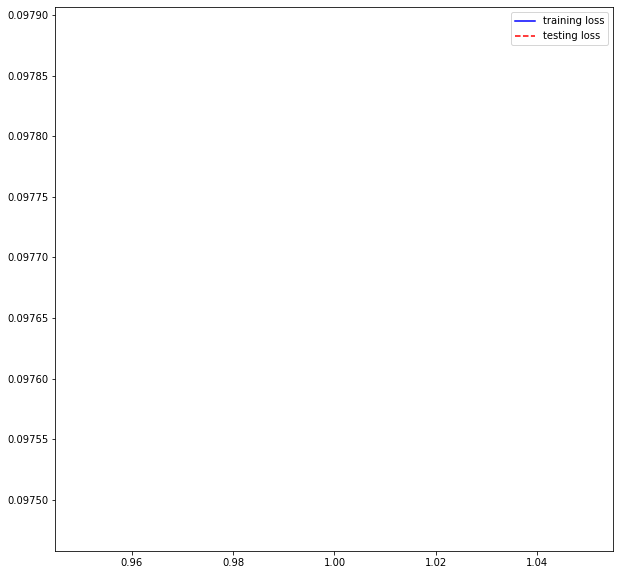

Elapsed training time: 0.79365 sec
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
v_input_14 (VInput)          (None, 22, 6)             132       
_________________________________________________________________
v_fractal_14 (VFractal)      (None, 7, 10)             898       
_________________________________________________________________
v_output_15 (VOutput)        (None, 10)                0         
Total params: 1,030
Trainable params: 1,030
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(6,), inner_hidden_layer_units=(4,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)

### V1(X):U(5)

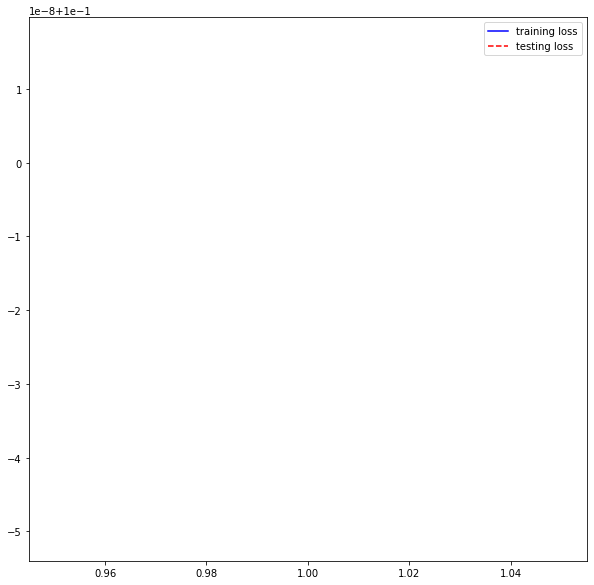

Elapsed training time: 1.26458 sec
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 21)]              0         
_________________________________________________________________
v_input_20 (VInput)          (None, 22, 5)             110       
_________________________________________________________________
v_fractal_20 (VFractal)      (None, 6, 10)             910       
_________________________________________________________________
v_output_21 (VOutput)        (None, 10)                0         
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_fun = lambda: get_vector_model(dataset_shapes, fractal_depth=1, hidden_layer_units=(5,), inner_hidden_layer_units=(5,), \
    activation='relu', output_activation=None, \
    weight_type="unique", weight_initializer='random_normal', \
    optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.MeanSquaredError()])

test_model(model_fun(), train_dataset, test_dataset, epochs=1, loss_name="mean_squared_error", measure_name="val_mean_squared_error", \
    print_summary=True)